...Applying Silhouette Analysis...
k = 2, Silhouette Score = 0.5902
k = 3, Silhouette Score = 0.7569
k = 4, Silhouette Score = 0.7916
k = 5, Silhouette Score = 0.6642
k = 6, Silhouette Score = 0.5330
k = 7, Silhouette Score = 0.4263
k = 8, Silhouette Score = 0.3352
k = 9, Silhouette Score = 0.3454
k = 10, Silhouette Score = 0.3617


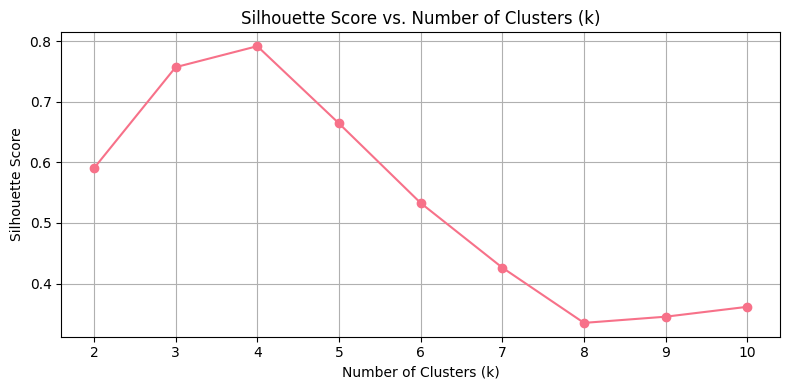


 Optimal number of clusters (k): 4


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_blobs, make_circles
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, adjusted_rand_score
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#Setting style for better plots
plt.style.use('default')
sns.set_palette("husl")

print("=" * 50)
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42)

#Function to perform silhouette analysis
def silhouette_analysis(X, max_k=10):
    silhouette_scores = {}
    for k in range(2, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
        labels = kmeans.fit_predict(X)
        score = silhouette_score(X, labels)
        silhouette_scores[k] = score
        print(f"k = {k}, Silhouette Score = {score:.4f}")

    #Plotting
    plt.figure(figsize=(8,4))
    plt.plot(list(silhouette_scores.keys()), list(silhouette_scores.values()), marker='o')
    plt.title("Silhouette Score vs. Number of Clusters (k)")
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("Silhouette Score")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    #Return the dictionary of scores
    return silhouette_scores

print("...Applying Silhouette Analysis...")
silhouette_scores = silhouette_analysis(X, max_k=10)

#Finding the best k
best_k = max(silhouette_scores, key=silhouette_scores.get)
print(f"\n Optimal number of clusters (k): {best_k}")

In [11]:
# Clustering with Synthetic Data

def create_sample_datasets():
    """Creating different types of datasets for clustering"""
    # Dataset 1: Well-separated blobs
    X1, y1 = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)
    X2, y2 = make_circles(n_samples=300, noise=0.05, factor =0.6, random_state=42)

    X3 = np.random.rand(300, 2) * 10
    y3 = np.zeros(300)                 # No true clusters

    return (X1, y1), (X2, y2), (X3, y3)

In [19]:
def visualize_datasets():
    """Visualize different types of data"""
    datasets = create_sample_datasets()

    fig, axes = plt.subplots(1, 3, figsize=(15,4))
    titles = ['Well-separated Blobs', 'Concentric Circles', 'Random Data']

    for i, ((X,y), title) in enumerate(zip(datasets, titles)):
        axes[i].scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', alpha=0.7)
        axes[i].set_title(title)
        axes[i].set_xlabel('Feature 1')
        axes[i].set_ylabel('Feature 2')

    plt.tight_layout()
    plt.show()


 Understanding Different Data Types


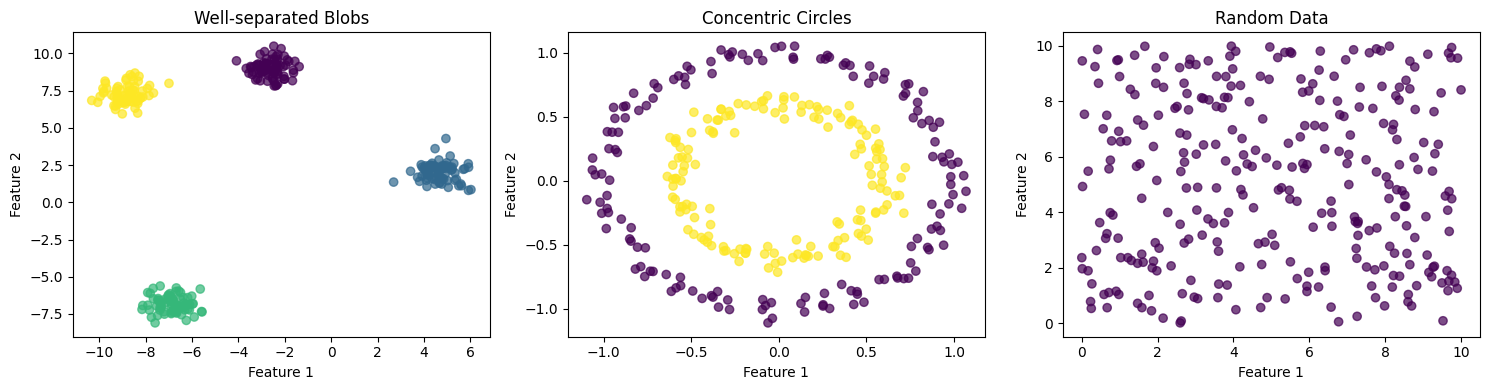

In [20]:
print("\n Understanding Different Data Types")
visualize_datasets()

In [30]:
# =============================================================================
# K-Means Implementation from Scratch
# =============================================================================

class KMeansFromScratch:
    """K-Means clustering implementation from scratch"""
    
    def __init__(self, k=3, max_iters=100, random_state=42):
        self.k = k
        self.max_iters = max_iters
        self.random_state = random_state
        
    def initialize_centroids(self, X):
        """Initialize centroids randomly"""
        np.random.seed(self.random_state)
        n_samples, n_features = X.shape
        centroids = np.zeros((self.k, n_features))
        
        for i in range(n_features):
            centroids[:, i] = np.random.uniform(
                X[:, i].min(), X[:, i].max(), self.k
            )
        return centroids
    
    def euclidean_distance(self, point1, point2):
        """Calculate Euclidean distance between two points"""
        return np.sqrt(np.sum((point1 - point2) ** 2))
    
    def assign_clusters(self, X, centroids):
        """Assign each point to the nearest centroid"""
        n_samples = X.shape[0]
        cluster_labels = np.zeros(n_samples)
        
        for i, point in enumerate(X):
            distances = [self.euclidean_distance(point, centroid) 
                        for centroid in centroids]
            cluster_labels[i] = np.argmin(distances)
        
        return cluster_labels
    
    def update_centroids(self, X, cluster_labels):
        """Update centroids to the mean of assigned points"""
        n_features = X.shape[1]
        centroids = np.zeros((self.k, n_features))
        
        for k in range(self.k):
            cluster_points = X[cluster_labels == k]
            if len(cluster_points) > 0:
                centroids[k] = np.mean(cluster_points, axis=0)
        
        return centroids
    
    def calculate_wcss(self, X, centroids, cluster_labels):
        """Calculate Within-Cluster Sum of Squares"""
        wcss = 0
        for k in range(self.k):
            cluster_points = X[cluster_labels == k]
            if len(cluster_points) > 0:
                wcss += np.sum((cluster_points - centroids[k]) ** 2)
        return wcss
    
    def fit(self, X):
        """Fit K-Means to the data"""
        # Initialize centroids
        self.centroids = self.initialize_centroids(X)
        self.wcss_history = []
        
        for iteration in range(self.max_iters):
            # Assign clusters
            cluster_labels = self.assign_clusters(X, self.centroids)
            
            # Calculate WCSS
            wcss = self.calculate_wcss(X, self.centroids, cluster_labels)
            self.wcss_history.append(wcss)
            
            # Update centroids
            new_centroids = self.update_centroids(X, cluster_labels)
            
            # Check for convergence
            if np.allclose(self.centroids, new_centroids, rtol=1e-4):
                print(f"Converged after {iteration + 1} iterations")
                break
                
            self.centroids = new_centroids
        
        self.labels_ = cluster_labels
        self.inertia_ = wcss
        return self
    
    def predict(self, X):
        """Predict cluster labels for new data"""
        return self.assign_clusters(X, self.centroids)
    
    def plot_convergence(self):
        """Plot WCSS convergence"""
        plt.figure(figsize=(8, 5))
        plt.plot(self.wcss_history, 'bo-')
        plt.title('K-Means Convergence')
        plt.xlabel('Iteration')
        plt.ylabel('WCSS')
        plt.grid(True, alpha=0.3)
        plt.show()


🔧 Exercise 2: K-Means Implementation from Scratch
Converged after 12 iterations


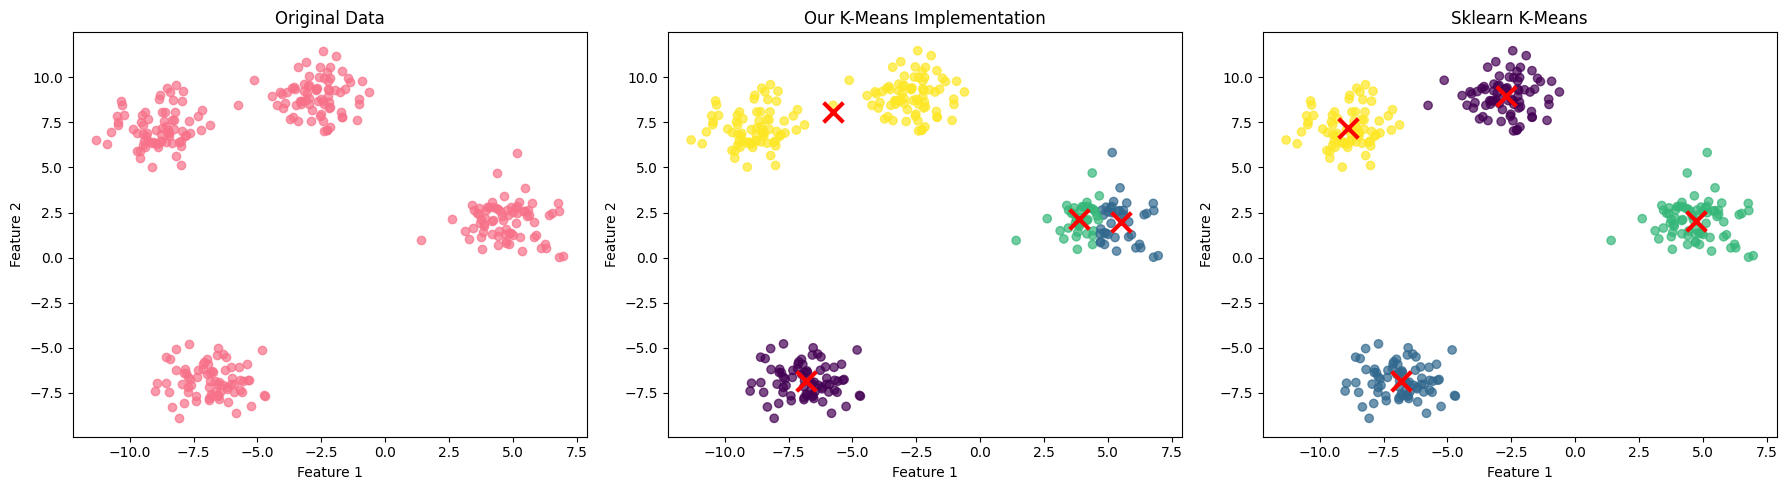

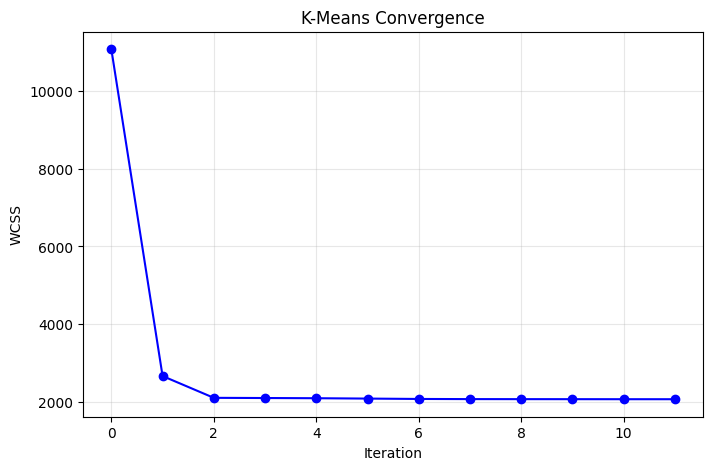

Our WCSS: 2060.54
Sklearn WCSS: 564.91


In [31]:
def demonstrate_kmeans_scratch():
    """Demonstrate K-Means implementation from scratch"""
    print("\n🔧 Exercise 2: K-Means Implementation from Scratch")
    
    # Create sample data
    X, _ = make_blobs(n_samples=300, centers=4, cluster_std=1.0, 
                      random_state=42)
    
    # Apply our K-Means
    kmeans_scratch = KMeansFromScratch(k=4, random_state=42)
    kmeans_scratch.fit(X)
    
    # Compare with sklearn
    kmeans_sklearn = KMeans(n_clusters=4, random_state=42, n_init=10)
    sklearn_labels = kmeans_sklearn.fit_predict(X)
    
    # Visualize results
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    # Original data
    axes[0].scatter(X[:, 0], X[:, 1], alpha=0.7)
    axes[0].set_title('Original Data')
    axes[0].set_xlabel('Feature 1')
    axes[0].set_ylabel('Feature 2')
    
    # Our implementation
    axes[1].scatter(X[:, 0], X[:, 1], c=kmeans_scratch.labels_, 
                   cmap='viridis', alpha=0.7)
    axes[1].scatter(kmeans_scratch.centroids[:, 0], 
                   kmeans_scratch.centroids[:, 1], 
                   c='red', marker='x', s=200, linewidths=3)
    axes[1].set_title('Our K-Means Implementation')
    axes[1].set_xlabel('Feature 1')
    axes[1].set_ylabel('Feature 2')
    
    # Sklearn implementation
    axes[2].scatter(X[:, 0], X[:, 1], c=sklearn_labels, 
                   cmap='viridis', alpha=0.7)
    axes[2].scatter(kmeans_sklearn.cluster_centers_[:, 0], 
                   kmeans_sklearn.cluster_centers_[:, 1], 
                   c='red', marker='x', s=200, linewidths=3)
    axes[2].set_title('Sklearn K-Means')
    axes[2].set_xlabel('Feature 1')
    axes[2].set_ylabel('Feature 2')
    
    plt.tight_layout()
    plt.show()
    
    # Show convergence
    kmeans_scratch.plot_convergence()
    
    print(f"Our WCSS: {kmeans_scratch.inertia_:.2f}")
    print(f"Sklearn WCSS: {kmeans_sklearn.inertia_:.2f}")

demonstrate_kmeans_scratch()


📈 Exercise 3: Choosing the Right Number of Clusters
Applying Elbow Method...


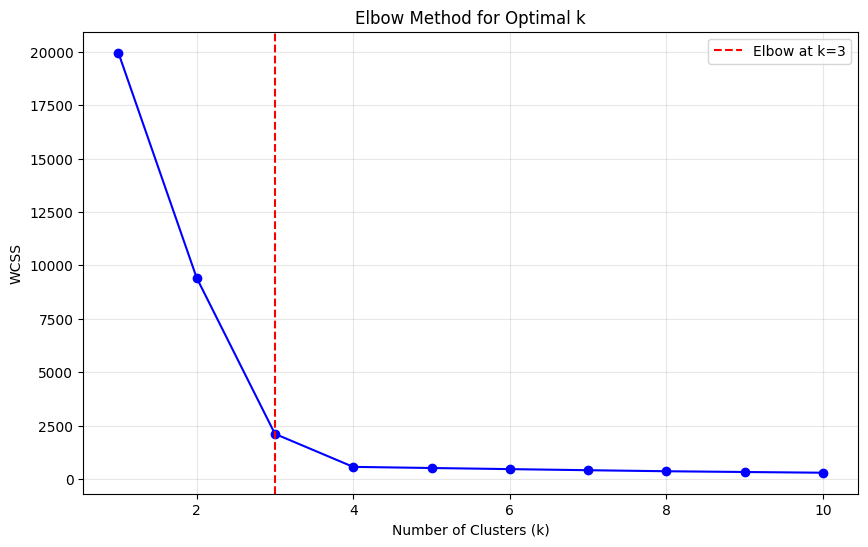

Applying Silhouette Analysis...


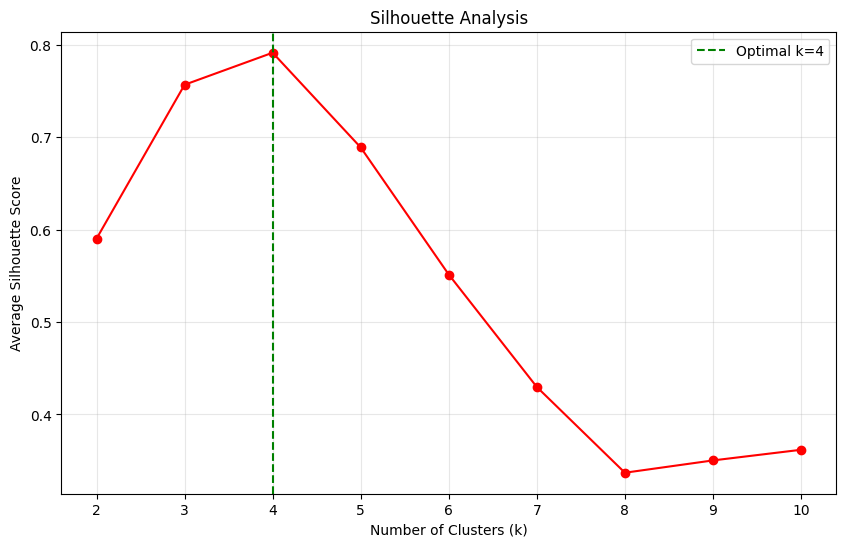

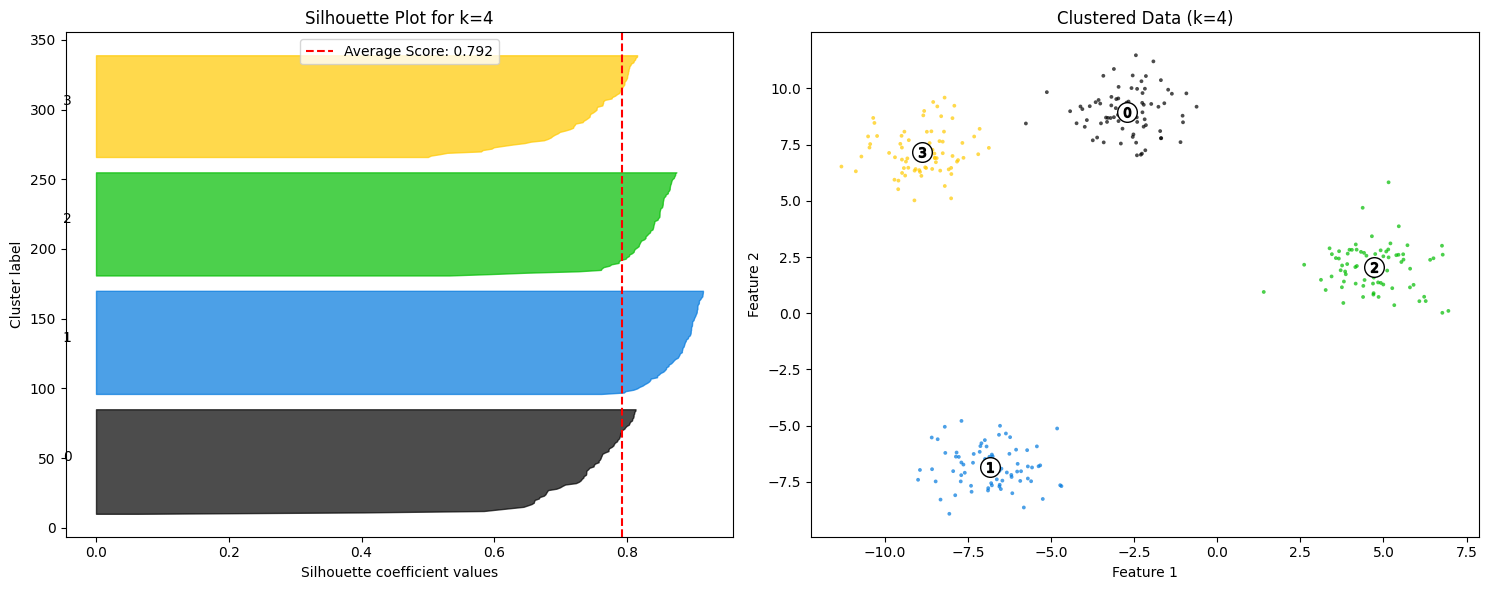

In [33]:
# =============================================================================
# Choosing the Right Number of Clusters
# =============================================================================

def elbow_method(X, max_k=10):
    """Implement elbow method to find optimal k"""
    wcss = []
    k_range = range(1, max_k + 1)
    
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)
    
    # Plot elbow curve
    plt.figure(figsize=(10, 6))
    plt.plot(k_range, wcss, 'bo-')
    plt.title('Elbow Method for Optimal k')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('WCSS')
    plt.grid(True, alpha=0.3)
    
    # Calculate elbow point using second derivative
    if len(wcss) > 2:
        # Calculate first and second derivatives
        first_derivative = np.gradient(wcss)
        second_derivative = np.gradient(first_derivative)
        
        # Find elbow (maximum curvature)
        elbow_k = k_range[np.argmax(second_derivative[1:-1]) + 1]
        plt.axvline(x=elbow_k, color='red', linestyle='--', 
                   label=f'Elbow at k={elbow_k}')
        plt.legend()
    
    plt.show()
    return wcss

def silhouette_analysis(X, max_k=10):
    """Perform silhouette analysis"""
    silhouette_scores = []
    k_range = range(2, max_k + 1)
    
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        cluster_labels = kmeans.fit_predict(X)
        silhouette_avg = silhouette_score(X, cluster_labels)
        silhouette_scores.append(silhouette_avg)
    
    # Plot silhouette scores
    plt.figure(figsize=(10, 6))
    plt.plot(k_range, silhouette_scores, 'ro-')
    plt.title('Silhouette Analysis')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Average Silhouette Score')
    plt.grid(True, alpha=0.3)
    
    # Find optimal k
    optimal_k = k_range[np.argmax(silhouette_scores)]
    plt.axvline(x=optimal_k, color='green', linestyle='--', 
               label=f'Optimal k={optimal_k}')
    plt.legend()
    plt.show()
    
    return silhouette_scores

def demonstrate_cluster_selection():
    """Demonstrate methods for choosing optimal k"""
    print("\n📈 Exercise 3: Choosing the Right Number of Clusters")
    
    # Create sample data with known clusters
    X, _ = make_blobs(n_samples=300, centers=4, cluster_std=1.0, 
                      random_state=42)
    
    print("Applying Elbow Method...")
    wcss_scores = elbow_method(X, max_k=10)
    
    print("Applying Silhouette Analysis...")
    silhouette_scores = silhouette_analysis(X, max_k=10)
    
    # Show detailed silhouette plot for optimal k
    optimal_k = np.argmax(silhouette_scores) + 2  # +2 because we start from k=2
    
    from sklearn.metrics import silhouette_samples
    
    kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Silhouette plot
    y_lower = 10
    for i in range(optimal_k):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        color = plt.cm.nipy_spectral(float(i) / optimal_k)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                         0, ith_cluster_silhouette_values,
                         facecolor=color, edgecolor=color, alpha=0.7)
        
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10
    
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster label')
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--",
                label=f'Average Score: {silhouette_avg:.3f}')
    ax1.legend()
    ax1.set_title(f'Silhouette Plot for k={optimal_k}')
    
    # Cluster visualization
    colors = plt.cm.nipy_spectral(cluster_labels.astype(float) / optimal_k)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')
    
    centers = kmeans.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')
    
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')
    
    ax2.set_title(f'Clustered Data (k={optimal_k})')
    ax2.set_xlabel('Feature 1')
    ax2.set_ylabel('Feature 2')
    
    plt.tight_layout()
    plt.show()

demonstrate_cluster_selection()


🌳 Exercise 4: Hierarchical Clustering Implementation from Scratch


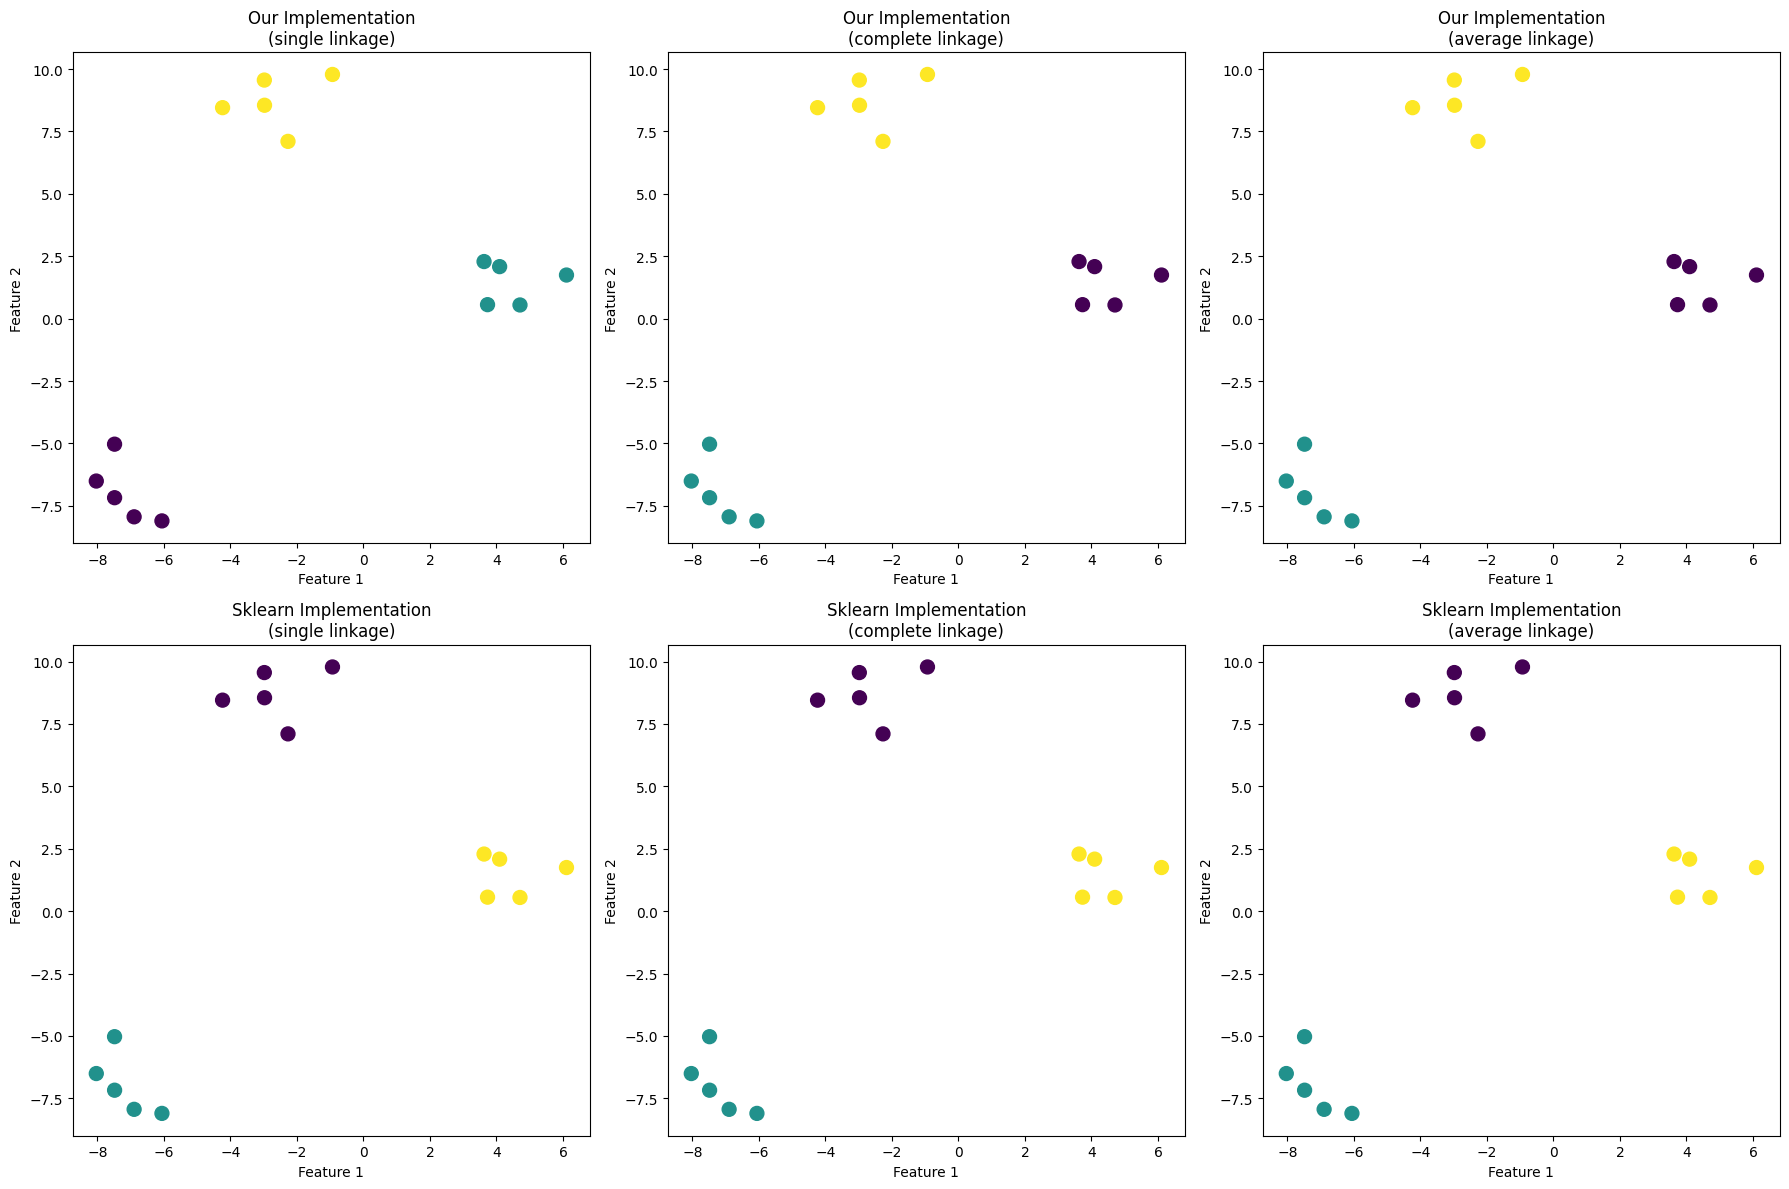

Showing dendrogram for single linkage:


ValueError: Linkage 'Z' uses the same cluster more than once.

<Figure size 1200x800 with 0 Axes>

In [34]:
# =============================================================================
# EXERCISE 4: Hierarchical Clustering Implementation from Scratch
# =============================================================================

class HierarchicalClusteringFromScratch:
    """Hierarchical clustering implementation from scratch"""
    
    def __init__(self, linkage='single'):
        self.linkage = linkage
        self.linkage_methods = {
            'single': self._single_linkage,
            'complete': self._complete_linkage,
            'average': self._average_linkage
        }
        
        if linkage not in self.linkage_methods:
            raise ValueError(f"Linkage must be one of {list(self.linkage_methods.keys())}")
    
    def _euclidean_distance(self, point1, point2):
        """Calculate Euclidean distance between two points"""
        return np.sqrt(np.sum((point1 - point2) ** 2))
    
    def _calculate_distance_matrix(self, X):
        """Calculate pairwise distance matrix"""
        n = len(X)
        distance_matrix = np.zeros((n, n))
        
        for i in range(n):
            for j in range(i + 1, n):
                dist = self._euclidean_distance(X[i], X[j])
                distance_matrix[i, j] = dist
                distance_matrix[j, i] = dist
        
        return distance_matrix
    
    def _single_linkage(self, cluster1, cluster2, distance_matrix):
        """Single linkage: minimum distance between clusters"""
        min_dist = float('inf')
        for i in cluster1:
            for j in cluster2:
                if distance_matrix[i, j] < min_dist:
                    min_dist = distance_matrix[i, j]
        return min_dist
    
    def _complete_linkage(self, cluster1, cluster2, distance_matrix):
        """Complete linkage: maximum distance between clusters"""
        max_dist = 0
        for i in cluster1:
            for j in cluster2:
                if distance_matrix[i, j] > max_dist:
                    max_dist = distance_matrix[i, j]
        return max_dist
    
    def _average_linkage(self, cluster1, cluster2, distance_matrix):
        """Average linkage: average distance between clusters"""
        total_dist = 0
        count = 0
        for i in cluster1:
            for j in cluster2:
                total_dist += distance_matrix[i, j]
                count += 1
        return total_dist / count if count > 0 else 0
    
    def fit(self, X):
        """Fit hierarchical clustering to the data"""
        self.X = X
        n_samples = len(X)
        self.distance_matrix = self._calculate_distance_matrix(X)
        
        # Initialize clusters - each point is its own cluster
        clusters = [{i} for i in range(n_samples)]
        self.linkage_matrix = []
        
        # Merge clusters until only one remains
        for step in range(n_samples - 1):
            # Find closest pair of clusters
            min_dist = float('inf')
            merge_i, merge_j = -1, -1
            
            for i in range(len(clusters)):
                for j in range(i + 1, len(clusters)):
                    dist = self.linkage_methods[self.linkage](
                        clusters[i], clusters[j], self.distance_matrix
                    )
                    if dist < min_dist:
                        min_dist = dist
                        merge_i, merge_j = i, j
            
            # Merge clusters
            cluster1 = clusters[merge_i]
            cluster2 = clusters[merge_j]
            merged_cluster = cluster1.union(cluster2)
            
            # Record merge information
            self.linkage_matrix.append([
                min(cluster1), min(cluster2), min_dist, len(merged_cluster)
            ])
            
            # Update clusters list
            new_clusters = []
            for i, cluster in enumerate(clusters):
                if i != merge_i and i != merge_j:
                    new_clusters.append(cluster)
            new_clusters.append(merged_cluster)
            clusters = new_clusters
        
        return self
    
    def get_clusters(self, n_clusters):
        """Get cluster labels for specified number of clusters"""
        if n_clusters >= len(self.linkage_matrix) + 1:
            return list(range(len(self.linkage_matrix) + 1))
        
        # Start with each point as its own cluster
        n_points = len(self.linkage_matrix) + 1
        clusters = [{i} for i in range(n_points)]
        
        # Perform merges until we have n_clusters
        merges_to_perform = n_points - n_clusters
        
        for i in range(merges_to_perform):
            merge_info = self.linkage_matrix[i]
            cluster1_min = int(merge_info[0])
            cluster2_min = int(merge_info[1])
            
            # Find clusters containing these points
            cluster1_idx = None
            cluster2_idx = None
            
            for j, cluster in enumerate(clusters):
                if cluster1_min in cluster:
                    cluster1_idx = j
                if cluster2_min in cluster:
                    cluster2_idx = j
            
            if cluster1_idx is not None and cluster2_idx is not None:
                merged = clusters[cluster1_idx].union(clusters[cluster2_idx])
                
                # Remove old clusters and add merged cluster
                new_clusters = []
                for j, cluster in enumerate(clusters):
                    if j != cluster1_idx and j != cluster2_idx:
                        new_clusters.append(cluster)
                new_clusters.append(merged)
                clusters = new_clusters
        
        # Convert to labels array
        labels = np.zeros(n_points, dtype=int)
        labels = np.zeros(n_points, dtype=int)
        for cluster_id, cluster in enumerate(clusters):
            for point in cluster:
                labels[point] = cluster_id
        
        return labels
    
    def plot_dendrogram(self):
        """Plot dendrogram of hierarchical clustering"""
        if not hasattr(self, 'linkage_matrix'):
            raise ValueError("Must fit the model first")
        
        plt.figure(figsize=(12, 8))
        dendrogram(np.array(self.linkage_matrix))
        plt.title(f'Hierarchical Clustering Dendrogram ({self.linkage} linkage)')
        plt.xlabel('Sample Index')
        plt.ylabel('Distance')
        plt.show()

def demonstrate_hierarchical_scratch():
    """Demonstrate hierarchical clustering from scratch"""
    print("\n🌳 Exercise 4: Hierarchical Clustering Implementation from Scratch")
    
    # Create small sample data for demonstration
    X_small, _ = make_blobs(n_samples=15, centers=3, cluster_std=1.0, 
                           random_state=42)
    
    # Test different linkage methods
    linkage_methods = ['single', 'complete', 'average']
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    
    for i, linkage_method in enumerate(linkage_methods):
        # Our implementation
        hc_scratch = HierarchicalClusteringFromScratch(linkage=linkage_method)
        hc_scratch.fit(X_small)
        
        # Get clusters for k=3
        labels_scratch = hc_scratch.get_clusters(n_clusters=3)
        
        # Sklearn implementation for comparison
        hc_sklearn = AgglomerativeClustering(n_clusters=3, linkage=linkage_method)
        labels_sklearn = hc_sklearn.fit_predict(X_small)
        
        # Plot our implementation
        axes[0, i].scatter(X_small[:, 0], X_small[:, 1], c=labels_scratch, 
                          cmap='viridis', s=100)
        axes[0, i].set_title(f'Our Implementation\n({linkage_method} linkage)')
        axes[0, i].set_xlabel('Feature 1')
        axes[0, i].set_ylabel('Feature 2')
        
        # Plot sklearn implementation
        axes[1, i].scatter(X_small[:, 0], X_small[:, 1], c=labels_sklearn, 
                          cmap='viridis', s=100)
        axes[1, i].set_title(f'Sklearn Implementation\n({linkage_method} linkage)')
        axes[1, i].set_xlabel('Feature 1')
        axes[1, i].set_ylabel('Feature 2')
    
    plt.tight_layout()
    plt.show()
    
    # Show dendrogram for single linkage
    print("Showing dendrogram for single linkage:")
    hc_single = HierarchicalClusteringFromScratch(linkage='single')
    hc_single.fit(X_small)
    hc_single.plot_dendrogram()

demonstrate_hierarchical_scratch()


⚖️ Exercise 5: Comprehensive Algorithm Comparison


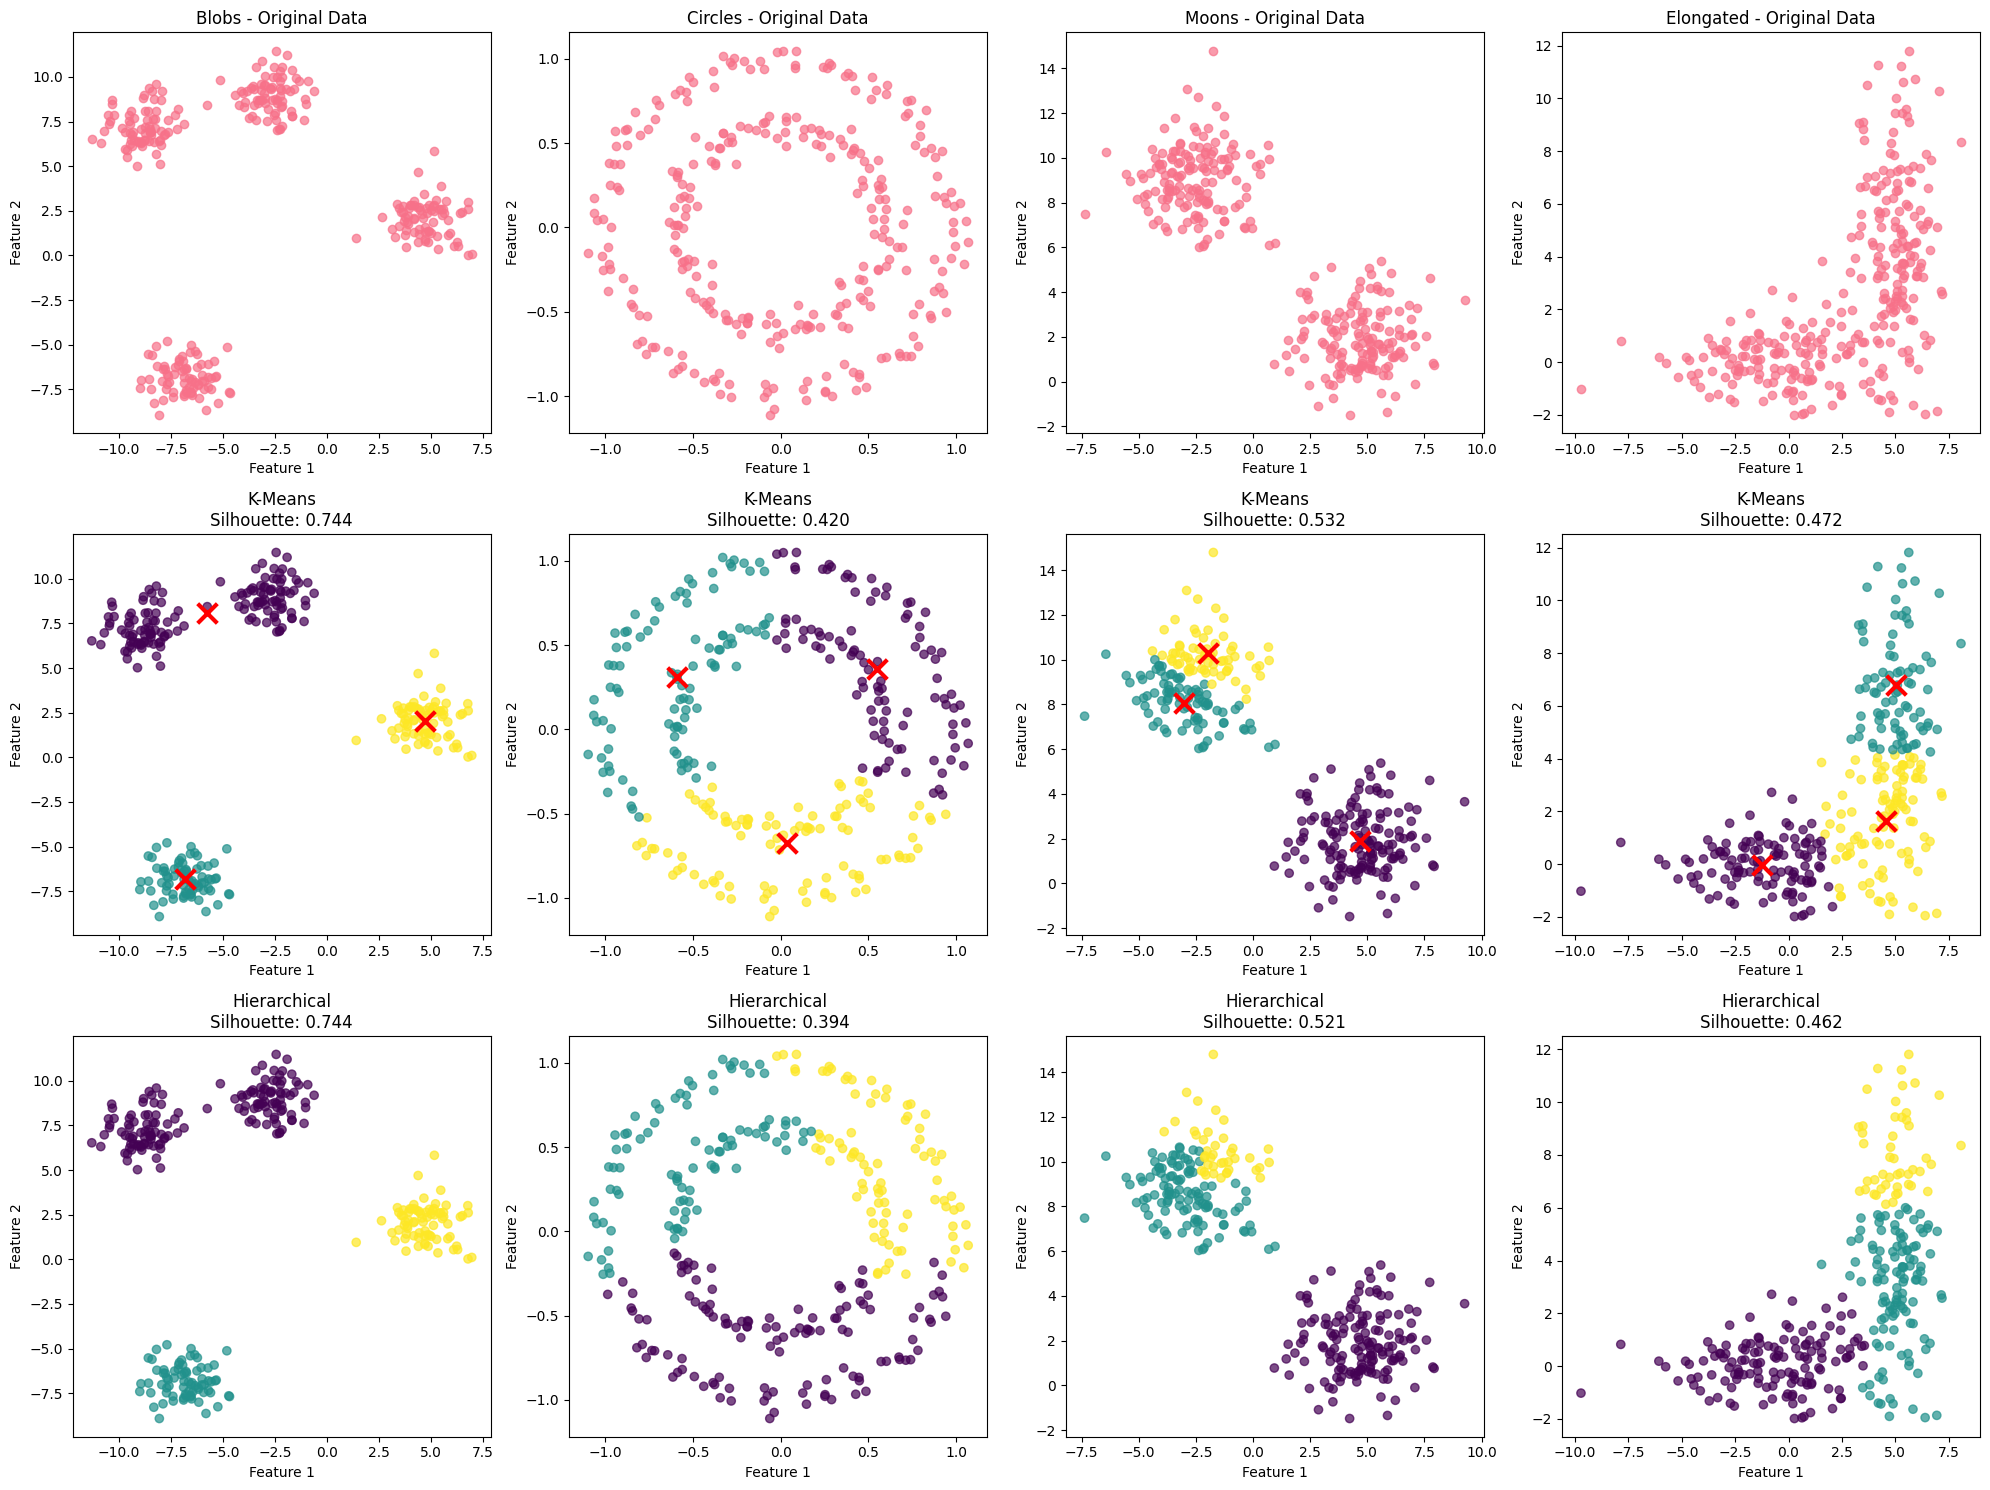


📊 Performance Summary:
Dataset		K-Means Silhouette	Hierarchical Silhouette	Better Algorithm
--------------------------------------------------------------------------------
Blobs       	0.744			0.744			Hierarchical
Circles     	0.420			0.394			K-Means
Moons       	0.532			0.521			K-Means
Elongated   	0.472			0.462			K-Means


In [35]:
# =============================================================================
# EXERCISE 5: Comprehensive Comparison and Trade-offs
# =============================================================================

def compare_clustering_algorithms():
    """Compare K-Means and Hierarchical clustering on different datasets"""
    print("\n⚖️ Exercise 5: Comprehensive Algorithm Comparison")
    
    # Create different types of datasets
    datasets = {
        'Blobs': make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42)[0],
        'Circles': make_circles(n_samples=300, noise=0.05, factor=0.6, random_state=42)[0],
        'Moons': make_blobs(n_samples=300, centers=2, cluster_std=1.5, random_state=42)[0]
    }
    
    # Add elongated clusters
    np.random.seed(42)
    elongated = np.random.randn(300, 2)
    elongated[:150, 0] *= 3  # Stretch first cluster
    elongated[150:, 1] *= 3  # Stretch second cluster
    elongated[150:, :] += [5, 5]  # Shift second cluster
    datasets['Elongated'] = elongated
    
    fig, axes = plt.subplots(3, 4, figsize=(20, 15))
    
    for i, (name, X) in enumerate(datasets.items()):
        # Standardize features
        X_scaled = StandardScaler().fit_transform(X)
        
        # K-Means
        kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
        kmeans_labels = kmeans.fit_predict(X_scaled)
        
        # Hierarchical (Ward linkage works well with K-Means comparison)
        hierarchical = AgglomerativeClustering(n_clusters=3, linkage='ward')
        hier_labels = hierarchical.fit_predict(X_scaled)
        
        # Calculate silhouette scores
        kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
        hier_silhouette = silhouette_score(X_scaled, hier_labels)
        
        # Plot original data
        axes[0, i].scatter(X[:, 0], X[:, 1], alpha=0.7)
        axes[0, i].set_title(f'{name} - Original Data')
        axes[0, i].set_xlabel('Feature 1')
        axes[0, i].set_ylabel('Feature 2')
        
        # Plot K-Means results
        axes[1, i].scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.7)
        axes[1, i].scatter(kmeans.cluster_centers_[:, 0] * StandardScaler().fit(X).scale_[0] + StandardScaler().fit(X).mean_[0],
                          kmeans.cluster_centers_[:, 1] * StandardScaler().fit(X).scale_[1] + StandardScaler().fit(X).mean_[1],
                          c='red', marker='x', s=200, linewidths=3)
        axes[1, i].set_title(f'K-Means\nSilhouette: {kmeans_silhouette:.3f}')
        axes[1, i].set_xlabel('Feature 1')
        axes[1, i].set_ylabel('Feature 2')
        
        # Plot Hierarchical results
        axes[2, i].scatter(X[:, 0], X[:, 1], c=hier_labels, cmap='viridis', alpha=0.7)
        axes[2, i].set_title(f'Hierarchical\nSilhouette: {hier_silhouette:.3f}')
        axes[2, i].set_xlabel('Feature 1')
        axes[2, i].set_ylabel('Feature 2')
    
    plt.tight_layout()
    plt.show()
    
    # Performance comparison table
    print("\n📊 Performance Summary:")
    print("Dataset\t\tK-Means Silhouette\tHierarchical Silhouette\tBetter Algorithm")
    print("-" * 80)
    
    for name, X in datasets.items():
        X_scaled = StandardScaler().fit_transform(X)
        
        kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
        kmeans_labels = kmeans.fit_predict(X_scaled)
        kmeans_sil = silhouette_score(X_scaled, kmeans_labels)
        
        hierarchical = AgglomerativeClustering(n_clusters=3, linkage='ward')
        hier_labels = hierarchical.fit_predict(X_scaled)
        hier_sil = silhouette_score(X_scaled, hier_labels)
        
        better = "K-Means" if kmeans_sil > hier_sil else "Hierarchical"
        print(f"{name:<12}\t{kmeans_sil:.3f}\t\t\t{hier_sil:.3f}\t\t\t{better}")

compare_clustering_algorithms()